# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [7]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")
from IPython.display import Markdown as md
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
d_name = 'none' 
m_name = 'lightGBM'
# train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' , index_col='name')
# u_df = pd.read_csv(f'temp_res_comp/unid_prob/{m_name}_{d_name}.csv' , index_col='name')
train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' ,)
u_df = pd.read_csv(f'temp_res_comp/unid-non-var-prob/{m_name}_{d_name}.csv' , )
classes = ['AGN' ,'YSO' ,'STAR' ,'HMXB' ,'LMXB' ,'ULX' ,'CV' ,'PULSAR']

### ROC-AUC curve

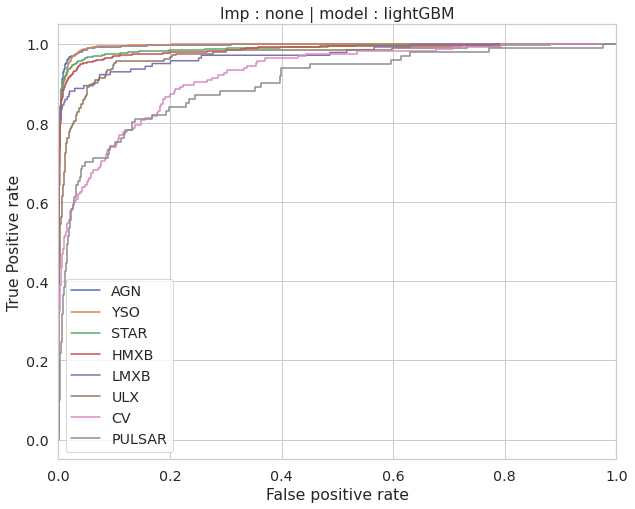

In [9]:
from sklearn.metrics import roc_curve
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,8))
fpr , tpr , th = {} ,{} ,{}
sns.set_palette('tab10')
for cl in classes:
#cl = 'ULX'
    temp_res = train_df.copy()
    temp_res['true_class']  = [1 if el==cl else 0 for el in temp_res['true_class']]
    fpr , tpr , th = roc_curve(temp_res['true_class'] , temp_res[f'prob_{cl}'] , )
    ax.plot(fpr,tpr , label=cl)
    ax.set_xlim(0,1)
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.title(f'Imp : {d_name} | model : {m_name}')
plt.legend()
plt.savefig(f'temp_res_comp/roc-auc/{d_name}_{m_name}.png')
plt.show()

### Confusion Matrix

offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938


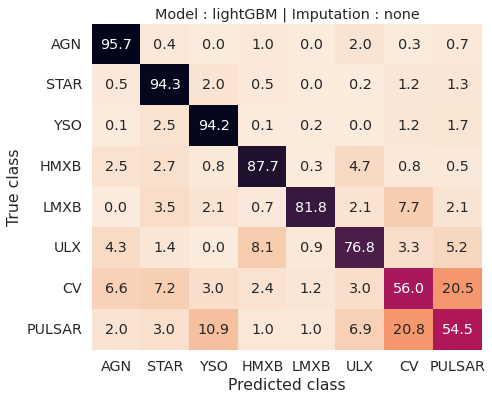

In [10]:
from utilities import plot_cf
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 ,
    'cbar' : False ,
    'plot_num' : 0,
}
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(7,6))
plot_cf([train_df] , plot_dict=plot_dict_def , confidance=0. , ax=ax)
plt.title(f'Model : {m_name} | Imputation : {d_name}')
plt.savefig(f'temp_res_comp/cf/{m_name}_{d_name}.png')
plt.show()

### Scores

In [11]:
from utilities import get_score
score = get_score([train_df])
score

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2712
 AGN           2348
 YSO           1162
 HMXB           717
 ULX            265
 CV             193
 PULSAR         179
 LMXB           127,
 'balanced_accuracy': 0.8010840064760618,
 'accuracy': 0.9199013371413735,
 'precision': 0.9306127802294764,
 'recall': 0.9199013371413735,
 'f1': 0.924317919313964,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.956576         0.975724  0.966055
 CV          0.560241         0.481865  0.518106
 HMXB        0.877005         0.914923  0.895563
 LMXB        0.818182         0.921260  0.866667
 PULSAR      0.544554         0.307263  0.392857
 STAR        0.942652         0.969764  0.956016
 ULX         0.767773         0.611321  0.680672
 YSO         0.941688         0.931153  0.936391}

### Train Data pred Histogram

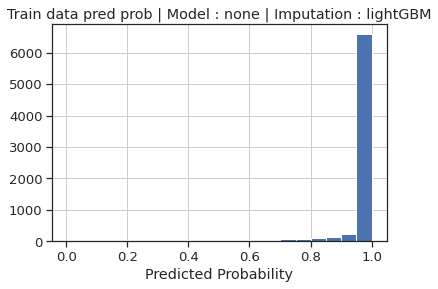

In [12]:
plt.hist(train_df['pred_prob'] , bins=20)
plt.title(f'Train data pred prob | Model : {d_name} | Imputation : {m_name}')
plt.xlabel('Predicted Probability')
plt.savefig(f'temp_res_comp/train_prob_dist/{d_name}_{m_name}.jpg')
plt.show()

### Unidentified sources

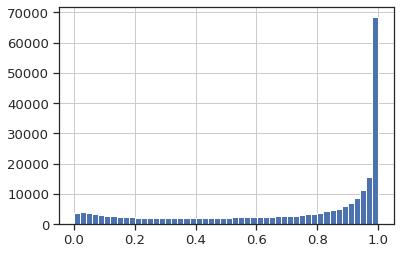

In [13]:
x ,y ,z = plt.hist(u_df['prob'] ,bins=50)
plt.show()

In [14]:
mode = y[np.argmax(x)]
mode

0.9800093850712066

In [15]:
u_df_num = u_df['class'].value_counts().to_frame()
u_df_num = pd.concat([
                u_df['class'].value_counts() ,
                u_df[u_df['prob']>mode]['class'].value_counts(),
                u_df[u_df['prob']>0.5]['class'].value_counts(),
                u_df[u_df['prob']>0.6]['class'].value_counts(),
                u_df[u_df['prob']>0.7]['class'].value_counts(),
                u_df[u_df['prob']>0.8]['class'].value_counts(),
                u_df[u_df['prob']>0.9]['class'].value_counts(),
                u_df[u_df['prob']>0.98]['class'].value_counts(),
                 ] , axis=1)
u_df_num.columns = ['Argmax' , f"Most probable > {mode :.2f}" ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9' ,'0.98']
u_df_num.index.name = 'class'
#u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
u_df_num.append(u_df_num.sum() , ignore_index=True)
print(u_df_num.to_markdown())

| class   |   Argmax |   Most probable > 0.98 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   0.98 |
|:--------|---------:|-----------------------:|------:|------:|------:|------:|------:|-------:|
| AGN     |    66390 |                  25279 | 54354 | 51796 | 48725 | 44733 | 37909 |  25282 |
| PULSAR  |    39429 |                  11727 | 29821 | 27951 | 25780 | 23150 | 19247 |  11732 |
| STAR    |    34400 |                  13332 | 26788 | 25369 | 23942 | 22220 | 19500 |  13334 |
| ULX     |    33199 |                   4428 | 22497 | 20412 | 18024 | 15101 | 10975 |   4430 |
| HMXB    |    27362 |                   7095 | 19093 | 17766 | 16343 | 14557 | 11858 |   7096 |
| CV      |    17929 |                   1283 |  8162 |  7062 |  5758 |  4588 |  3099 |   1283 |
| YSO     |    17889 |                   5111 | 14208 | 13197 | 12006 | 10597 |  8421 |   5111 |
| LMXB    |      578 |                    151 |   345 |   332 |   313 |   186 |   169 |    151 |


In [16]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
sample = [u_df[u_df['class']==c]['prob'] for c in cl]

In [17]:
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title=f"Unidentified sources | Imputation : {d_name} | classifier : {m_name}",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image(f'temp_res_comp/unid_prob_dist/{m_name}_{d_name}.jpg')
fig.show()